In [152]:
# some essential libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [153]:
# dataset taken forom kaggle https://www.kaggle.com/code/sergylog/ab-test-data-analysis/notebook to test whether revenue changed between control and test group
df = pd.read_csv('AB_Test_Results.csv')

In [154]:
df.head()

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


In [156]:
df.describe()

,USER_ID,REVENUE
count,10000.000000,10000.000000
mean,4981.080200,0.099447
std,2890.590115,2.318529
min,2.000000,0.000000
25%,2468.750000,0.000000
50%,4962.000000,0.000000
75%,7511.500000,0.000000
max,10000.000000,196.010000


In [157]:
df['VARIANT_NAME'].value_counts()

VARIANT_NAME
variant    5016
control    4984
Name: count, dtype: int64

In [158]:
d = df.groupby('USER_ID')['VARIANT_NAME'].nunique().value_counts()
d
# df.groupby('USER_ID')['VARIANT_NAME'].nunique() number of groups for every user
# df.groupby('USER_ID')['VARIANT_NAME'].nunique().value_counts() distribution of number of groups for every user

VARIANT_NAME
1    4783
2    1541
Name: count, dtype: int64

In [159]:
# we need to exclude the users who appear to be in both groups, control and test (variant)
single_group_users = df.groupby('USER_ID')['VARIANT_NAME'].nunique()==1
single_group_users=single_group_users[single_group_users]



In [160]:
df = df[df['USER_ID'].isin(single_group_users.index)]
df.shape

(6070, 3)

<Axes: xlabel='VARIANT_NAME', ylabel='REVENUE'>

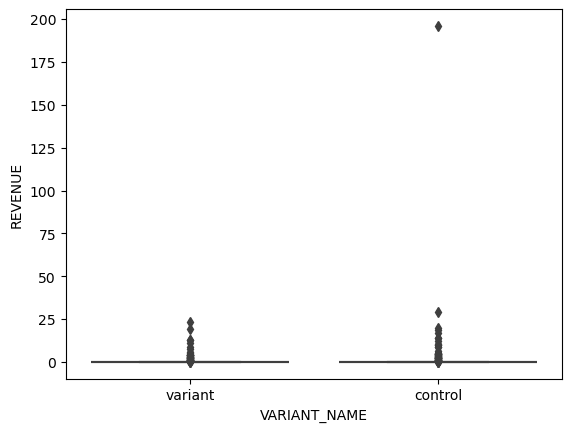

In [161]:
sns.boxplot(x = 'VARIANT_NAME',y='REVENUE',data = df)
# we see a big outlier here that we want to check which user has it

In [162]:
df.sort_values(by='REVENUE',ascending=False)
# user #3342

,USER_ID,VARIANT_NAME,REVENUE
1437,3342,control,196.01
8168,2166,control,29.32
2482,7356,variant,23.04
6412,1053,control,20.07
5217,3684,variant,19.47
...,...,...,...
3366,1189,control,0.00
3363,2051,variant,0.00
3362,3276,variant,0.00
3360,1608,variant,0.00


In [163]:
df = df.drop(df[df['USER_ID']==3342].index)
# dropping this user from dataset

<Axes: xlabel='VARIANT_NAME', ylabel='REVENUE'>

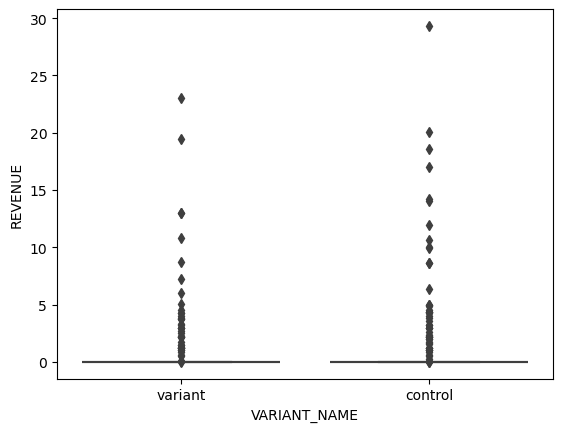

In [164]:
sns.boxplot(x = 'VARIANT_NAME',y='REVENUE',data = df)
# there are a lot of 

<Axes: xlabel='VARIANT_NAME', ylabel='REVENUE'>

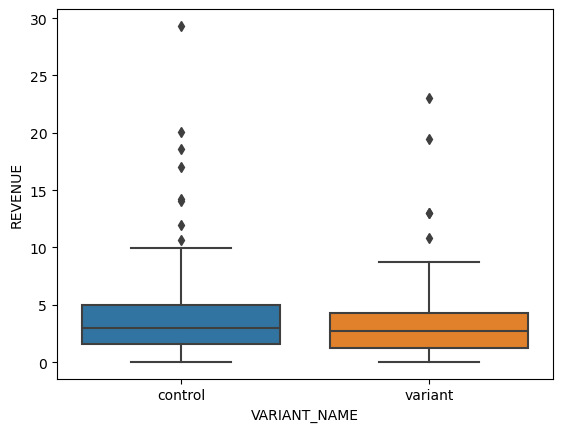

In [165]:
# its obvious from the previous chart that both variant and control group have a lot of 0 values, lets filter out those
sns.boxplot(x = df[df['REVENUE']>0]['VARIANT_NAME'],y = df[df['REVENUE']>0]['REVENUE'],data =df[df['REVENUE']>0] )

In [166]:
# seems like control group has larger mean revenue
# but there should be users who spent 0 and spent some actual amount at the same time, we need to aggregate those

In [167]:
df = df.groupby(by=['USER_ID', 'VARIANT_NAME']).sum().reset_index()
# group by the users

<Axes: xlabel='VARIANT_NAME', ylabel='REVENUE'>

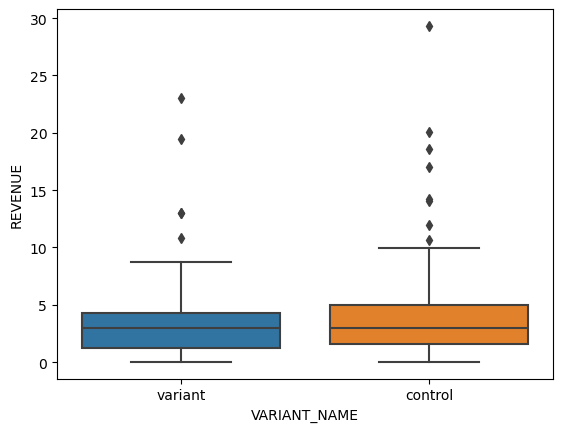

In [168]:
# after grouping the values, we see that control group mean now appears to be larger
sns.boxplot(x = df[df['REVENUE']>0]['VARIANT_NAME'],y = df[df['REVENUE']>0]['REVENUE'],data =df[df['REVENUE']>0] )

In [169]:
# lets check statitics for every group
stat_all = df.groupby(by = 'VARIANT_NAME').agg({'USER_ID':'nunique','REVENUE':['mean','median', 'count']})

In [170]:
stat_all

USER_ID   REVENUE             
             nunique      mean median count
VARIANT_NAME                               
control         2389  0.114923    0.0  2389
variant         2393  0.074935    0.0  2393

In [171]:
stat_paying = df[df['REVENUE']>0].groupby(by = 'VARIANT_NAME').agg({'USER_ID':'nunique','REVENUE':['mean','median', 'count']})

In [172]:
stat_paying

USER_ID   REVENUE             
             nunique      mean median count
VARIANT_NAME                               
control           53  5.180189   2.99    53
variant           42  4.269524   2.97    42

In [173]:
df_paying = df[df['REVENUE']>0]

/var/folders/kt/9n0jhp6j46z2kk19gfk3fb5w0000gn/T/ipykernel_1204/2960234761.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df['VARIANT_NAME'] == 'control', 'REVENUE'], ax = axes[0], label='control')
/var/folders/kt/9n0jhp6j46z2kk19gfk3fb5w0000gn/T/ipykernel_1204/2960234761.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147e

Text(0.5, 1.0, 'Distribution of revenue of paying users')

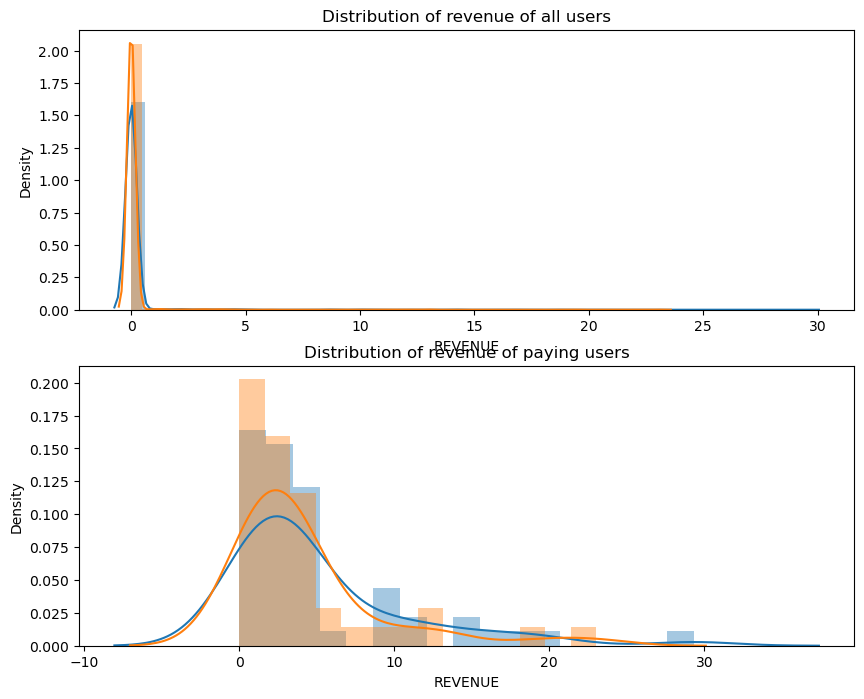

In [174]:
f, axes = plt.subplots(2, figsize=(10,8))

sns.distplot(df.loc[df['VARIANT_NAME'] == 'control', 'REVENUE'], ax = axes[0], label='control')
sns.distplot(df.loc[df['VARIANT_NAME'] == 'variant', 'REVENUE'], ax = axes[0], label='variant')
axes[0].set_title('Distribution of revenue of all users')



sns.distplot(df_paying.loc[df['VARIANT_NAME'] == 'control', 'REVENUE'], ax = axes[1], label='control')
sns.distplot(df_paying.loc[df['VARIANT_NAME'] == 'variant', 'REVENUE'], ax = axes[1], label='variant')
axes[1].set_title('Distribution of revenue of paying users')


Statistical tests

we already now that data is not normally distributed, but lets conduct a statistical test

In [175]:
variant_rev = df[df['VARIANT_NAME']=='variant']['REVENUE']
control_rev = df[df['VARIANT_NAME']=='control']['REVENUE']

null hypothesis: data is normally distributed

alternative: data is not normally distributed

In [176]:
from scipy.stats import shapiro

stat, p = shapiro(variant_rev)
print(f'Shapiro-Wilk Test: p-value = {p}')

if p > 0.05:
    print("Data is likely normal (fail to reject H0).")
else:
    print("Data is likely not normal (reject H0).")


Shapiro-Wilk Test: p-value = 0.0
Data is likely not normal (reject H0).


In [177]:
from scipy.stats import shapiro

stat, p = shapiro(control_rev)
print(f'Shapiro-Wilk Test: p-value = {p}')

if p > 0.05:
    print("Data is likely normal (fail to reject H0).")
else:
    print("Data is likely not normal (reject H0).")


Shapiro-Wilk Test: p-value = 0.0
Data is likely not normal (reject H0).


we use mann whitney as data is not normal and very skewed

h0: there is no significant difference between two groups

h1: these is a difference between groups

In [178]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U Test
stat, p = mannwhitneyu(control_rev, variant_rev)

# Print the results
print(f"Mann-Whitney U Test for all users: U={stat}, p-value={p}")

if p < 0.05:
    print("Reject H0: Significant difference between groups.")
else:
    print("Fail to reject H0: No significant difference.")


Mann-Whitney U Test for all users: U=2871768.0, p-value=0.24799555106821947
Fail to reject H0: No significant difference.


In [179]:
# only for paying users
variant_rev_p = df_paying[df_paying['VARIANT_NAME']=='variant']['REVENUE']
control_rev_p = df_paying[df_paying['VARIANT_NAME']=='control']['REVENUE']

In [180]:
# Perform Mann-Whitney U Test
stat, p = mannwhitneyu(control_rev_p, variant_rev_p)

# Print the results
print(f"Mann-Whitney U Test for all users: U={stat}, p-value={p}")

if p < 0.05:
    print("Reject H0: Significant difference between groups.")
else:
    print("Fail to reject H0: No significant difference.")

Mann-Whitney U Test for all users: U=1197.0, p-value=0.5314192217084708
Fail to reject H0: No significant difference.


In [127]:
# for both types of users there are no significant difference between control and variant 

Bootstrap

In [181]:
def get_bootstrap_samples(data, n_samples=1000):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices] # return 2d array of 1000 samples with length as data
    return samples

def stat_intervals(stat, alpha=0.05):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries # computing lower and upper bounds of the confidence intervals

In [182]:
# for all users
control = get_bootstrap_samples(control_rev.values, 10000) # need to take values
variant = get_bootstrap_samples(variant_rev.values, 10000)
# for paying users
control_p = get_bootstrap_samples(control_rev_p.values, 10000)
variant_p = get_bootstrap_samples(variant_rev_p.values, 10000)

/var/folders/kt/9n0jhp6j46z2kk19gfk3fb5w0000gn/T/ipykernel_1204/2045290203.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(np.mean(control, axis=1), shade=True, label='control')
/var/folders/kt/9n0jhp6j46z2kk19gfk3fb5w0000gn/T/ipykernel_1204/2045290203.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(np.mean(variant, axis=1), shade=True, label='variant')


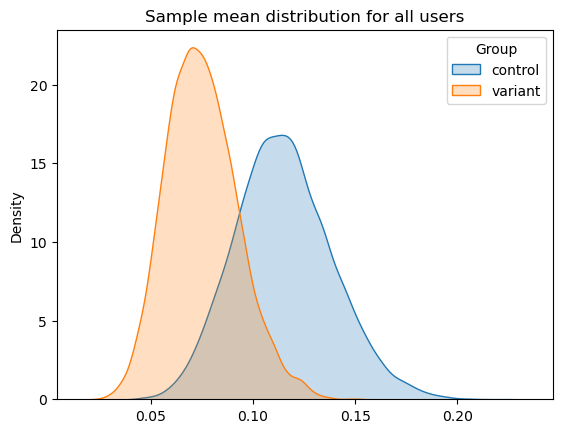

In [183]:
# check distribution of means of the samples for all users
f, ax = plt.subplots()
# plt.figure(figsize=(20,5))
sns.kdeplot(np.mean(control, axis=1), shade=True, label='control')
sns.kdeplot(np.mean(variant, axis=1), shade=True, label='variant')
plt.title('Sample mean distribution for all users')
plt.legend(title="Group")

/var/folders/kt/9n0jhp6j46z2kk19gfk3fb5w0000gn/T/ipykernel_1204/1333572677.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(np.mean(control_p, axis=1), shade=True, label='control')
/var/folders/kt/9n0jhp6j46z2kk19gfk3fb5w0000gn/T/ipykernel_1204/1333572677.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(np.mean(variant_p, axis=1), shade=True, label='variant')


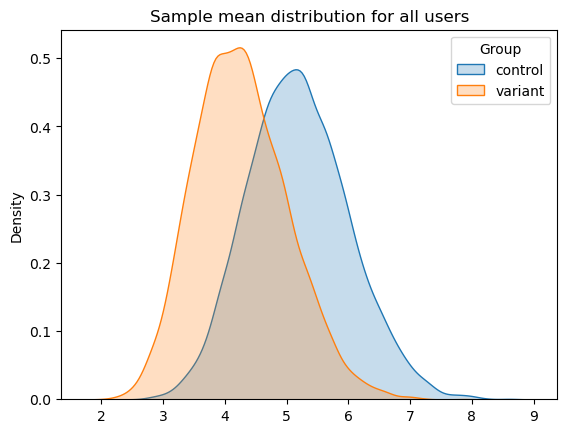

In [184]:
# check distribution of means of the samples for paying users
f, ax = plt.subplots()
# plt.figure(figsize=(20,5))
sns.kdeplot(np.mean(control_p, axis=1), shade=True, label='control')
sns.kdeplot(np.mean(variant_p, axis=1), shade=True, label='variant')
plt.title('Sample mean distribution for all users')
plt.legend(title="Group")

In [185]:
# its saying that ci can overlap, we to get the difference between groups 

In [186]:
def plot_distribution_and_stat_intervals(variant, control, title, alpha=0.05):
    """ Plot the distribution of the mean difference and return the confidence intervals """
    f, ax = plt.subplots()
    # get data for coloring confidence intervals
    points = sns.kdeplot(variant - control, shade=False).get_lines()[0].get_data()
    x = points[0]
    y = points[1]
    ymin, ymax = plt.ylim()
    # highlight the zero value and the bounds of the confidence interval
    plt.vlines(0, 0, ymax, label='0', color='gray')
    plt.vlines(stat_intervals(variant - control, alpha)[0], 0, ymax, linestyles="dashed")
    plt.vlines(stat_intervals(variant - control, alpha)[1], 0, ymax, linestyles="dashed")
    # color the confidence interval and zones outside it
    plt.fill_between(x,y,
                     where = (x >= stat_intervals(variant - control, alpha)[1]),
                     color='gainsboro')
    plt.fill_between(x,y,
                     where = (x <= stat_intervals(variant - control, alpha)[0]),
                     color='gainsboro')
    plt.fill_between(x,y,
                     where = ((x >= stat_intervals(variant - control, alpha)[0])
                              & (x <= stat_intervals(variant - control, alpha)[1])),
                     color='red',
                     label = '95% confidence interval')
    plt.title(f'Distribution of difference between means (variant - control) {title}; {100*(1-alpha)}% Confidence interval for difference of means: {stat_intervals(variant - control, alpha)}')
    plt.legend(prop={'size':13})
    # return confidence interval data
    return stat_intervals(variant - control)

/var/folders/kt/9n0jhp6j46z2kk19gfk3fb5w0000gn/T/ipykernel_1204/2173577954.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  points = sns.kdeplot(variant - control, shade=False).get_lines()[0].get_data()


array([-0.09840498,  0.0178571 ])

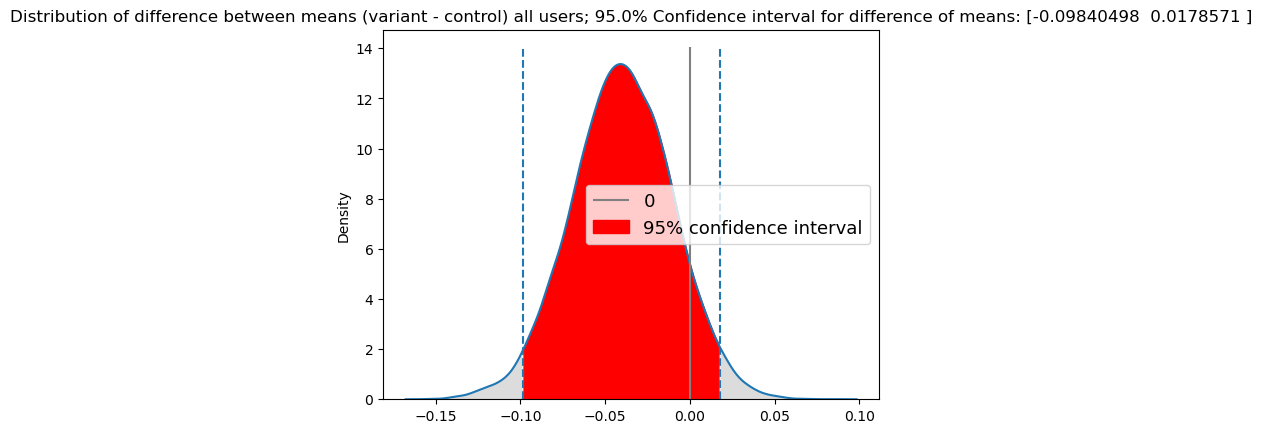

In [187]:
plot_distribution_and_stat_intervals(
    np.mean(variant, axis=1), 
    np.mean(control, axis=1),
    title='all users'
)

/var/folders/kt/9n0jhp6j46z2kk19gfk3fb5w0000gn/T/ipykernel_1204/2173577954.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  points = sns.kdeplot(variant - control, shade=False).get_lines()[0].get_data()


array([-3.07427055,  1.26421047])

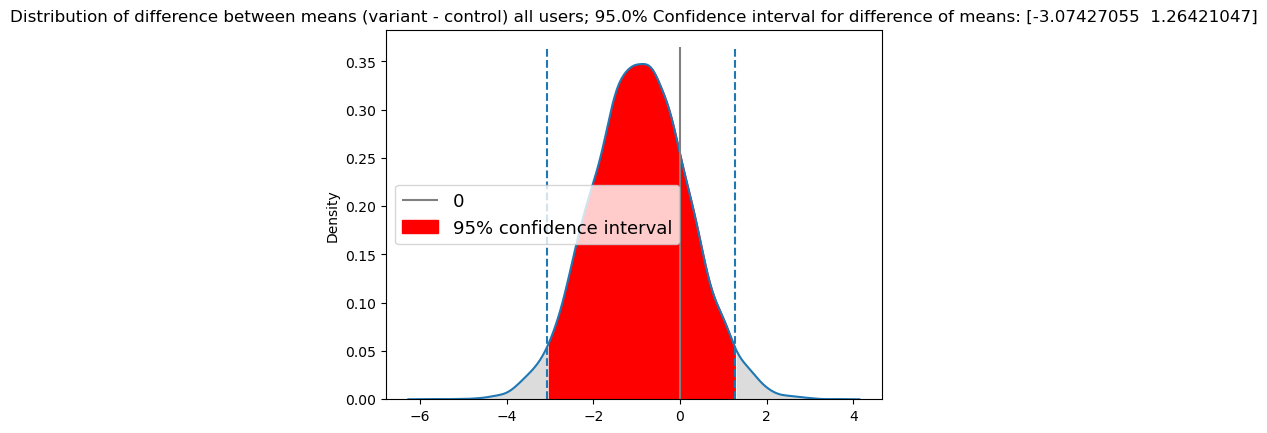

In [188]:
plot_distribution_and_stat_intervals(
    np.mean(variant_p, axis=1), 
    np.mean(control_p, axis=1),
    title='all users'
)

In [ ]:
# as 0 lies in between confidence boundaries, we can not say that there is a statistical difference between two groups in both cases, for all and paying users